# 집 값 예측(결측치 제외 Baseline)

## 머신러닝 과정
- 문제정의
- 데이터 수집
- 데이터 전처리
- 탐색적 데이터분석(EDA)
- 모델 선택 및 하이퍼파라미터 조정
- 모델 학습
- 모델 평가
- 서비스화(Web)

### 2. 데이터 수집

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리
from sklearn.preprocessing import LabelEncoder #인코딩 도구

In [178]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [179]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,NaN,21695,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,9,1988,2007,Hip,CompShg,Wd Sdng,Plywood,BrkFace,260.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,808.0,Unf,0.0,72.0,880.0,GasA,Ex,Y,SBrkr,1680,0,0,1680,1.0,0.0,2,0,3,1,Gd,5,Typ,1,Gd,Attchd,1988.0,Fin,2.0,540.0,TA,TA,Y,292,44,0,182,0,0,NaN,NaN,NaN,0,12,2009,WD,Normal,222000.000000
1,2,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1971,1971,Hip,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,282.0,LwQ,35.0,664.0,981.0,GasA,TA,Y,SBrkr,981,0,0,981,1.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,Detchd,1979.0,Unf,2.0,576.0,TA,TA,Y,0,312,40,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250.000000
2,3,20,RL,88.0,12803,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,99.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,922.0,Unf,0.0,572.0,1494.0,GasA,Ex,Y,SBrkr,1494,0,0,1494,1.0,0.0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2002.0,RFn,2.0,530.0,TA,TA,Y,192,36,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,221000.000000
3,4,60,FV,114.0,8314,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,569.0,569.0,GasA,Ex,Y,SBrkr,854,840,0,1694,0.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,BuiltIn,1997.0,Unf,1.0,434.0,TA,TA,Y,0,382,0,0,110,0,NaN,GdPrv,NaN,0,11,2006,WD,Normal,190269.599579
4,5,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1968,1993,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,570.0,Unf,0.0,891.0,1461.0,GasA,Gd,Y,SBrkr,1721,0,0,1721,0.0,0.0,2,1,3,1,TA,7,Min1,1,TA,Attchd,1968.0,RFn,2.0,440.0,TA,TA,Y,0,96,180,0,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,180000.000000


### 3. 데이터 전처리

#### 결측치 확인 및 드랍

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1751 non-null   int64  
 1   MSSubClass     1751 non-null   int64  
 2   MSZoning       1747 non-null   object 
 3   LotFrontage    1450 non-null   float64
 4   LotArea        1751 non-null   int64  
 5   Street         1751 non-null   object 
 6   Alley          125 non-null    object 
 7   LotShape       1751 non-null   object 
 8   LandContour    1751 non-null   object 
 9   Utilities      1750 non-null   object 
 10  LotConfig      1751 non-null   object 
 11  LandSlope      1751 non-null   object 
 12  Neighborhood   1751 non-null   object 
 13  Condition1     1751 non-null   object 
 14  Condition2     1751 non-null   object 
 15  BldgType       1751 non-null   object 
 16  HouseStyle     1751 non-null   object 
 17  OverallQual    1751 non-null   int64  
 18  OverallC

In [181]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    983 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          73 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1167 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [182]:
# 결측치 컬럼 모두 drop
train.drop(['MSZoning','LotFrontage', 'Alley','Utilities','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical','BsmtFullBath','BsmtHalfBath', 'Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','Exterior1st','Exterior2nd','KitchenQual','SaleType'],axis=1, inplace=True)
test.drop(['MSZoning','LotFrontage', 'Alley','Utilities','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical','BsmtFullBath','BsmtHalfBath', 'Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','Exterior1st','Exterior2nd','KitchenQual','SaleType'],axis=1, inplace=True)

In [183]:
print(train.shape)
print(test.shape)

(1751, 47)
(1168, 46)


### 4. 데이터 탐색

### 5~6. 모델링, 모델학습

#### 인코딩

In [184]:
#문자데이터 찾기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1751 non-null   int64  
 1   MSSubClass     1751 non-null   int64  
 2   LotArea        1751 non-null   int64  
 3   Street         1751 non-null   object 
 4   LotShape       1751 non-null   object 
 5   LandContour    1751 non-null   object 
 6   LotConfig      1751 non-null   object 
 7   LandSlope      1751 non-null   object 
 8   Neighborhood   1751 non-null   object 
 9   Condition1     1751 non-null   object 
 10  Condition2     1751 non-null   object 
 11  BldgType       1751 non-null   object 
 12  HouseStyle     1751 non-null   object 
 13  OverallQual    1751 non-null   int64  
 14  OverallCond    1751 non-null   int64  
 15  YearBuilt      1751 non-null   int64  
 16  YearRemodAdd   1751 non-null   int64  
 17  RoofStyle      1751 non-null   object 
 18  RoofMatl

In [185]:
numerical_feats = train.dtypes[train.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = train.dtypes[train.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  27
Number of Categorical features:  20


In [186]:
print(train[numerical_feats].columns) # 수치형
print("*"*80) 
print(train[categorical_feats].columns) # 범주형

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive', 'SaleCondition'],
      dtype='object')


In [187]:
# 순서O 데이터(라벨): LotShape, ExterQual, ExterCond, HeatingQC, CentralAir
# 순서X 데이터(원핫) Street, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Foundation, Heating, PavedDrive, SaleCondition 

In [188]:
# train과 test합치기
# 정답 컬럼 따로 빼놓고 드랍
y_train = train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

In [189]:
print(train.shape)
print(test.shape)

(1751, 46)
(1168, 46)


In [190]:
# train과 test합치기
combined = pd.concat([train,test],ignore_index=True) #세로로 붙이는 경우 axis=0(기본값)
combined

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1,20,21695,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,9,1988,2007,Hip,CompShg,Gd,Gd,CBlock,GasA,Ex,Y,1680,0,0,1680,2,0,3,1,5,1,Y,292,44,0,182,0,0,0,12,2009,Normal
1,2,20,10530,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1971,1971,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,981,0,0,981,1,1,3,1,5,0,Y,0,312,40,0,0,0,0,3,2007,Normal
2,3,20,12803,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,1494,0,0,1494,2,0,3,1,6,1,Y,192,36,0,0,0,0,0,9,2008,Normal
3,4,60,8314,Pave,IR1,Lvl,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,Gd,TA,PConc,GasA,Ex,Y,854,840,0,1694,2,1,3,1,6,1,Y,0,382,0,0,110,0,0,11,2006,Normal
4,5,20,10335,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1968,1993,Gable,CompShg,TA,TA,CBlock,GasA,Gd,Y,1721,0,0,1721,2,1,3,1,7,1,Y,0,96,180,0,0,0,0,7,2006,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,20,8402,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,1120,0,0,1120,1,0,3,1,6,0,Y,0,30,0,0,0,0,0,12,2007,Partial
2915,2916,50,9140,Pave,Reg,HLS,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,5,1921,1975,Gable,CompShg,TA,TA,BrkTil,GasA,Fa,Y,727,380,0,1107,1,0,2,1,5,0,Y,0,56,0,0,200,0,0,4,2010,Normal
2916,2917,20,8050,Pave,IR1,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,1143,0,0,1143,1,0,3,1,6,0,Y,0,0,0,0,0,0,0,5,2010,Normal
2917,2918,60,8637,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,947,767,0,1714,2,1,3,1,7,1,Y,256,48,0,0,0,0,0,4,2007,Abnorml


In [191]:
#라벨인코딩
#객체 생성
LotShape_encoder = LabelEncoder()
ExterQual_encoder = LabelEncoder()
ExterCond_encoder = LabelEncoder()
HeatingQC_encoder = LabelEncoder()
CentralAir_encoder = LabelEncoder()

In [192]:
#인코더에 컬럼 대입
LotShape_encoder.fit(combined['LotShape'])
ExterQual_encoder.fit(combined['ExterQual'])
ExterCond_encoder.fit(combined['ExterCond'])
HeatingQC_encoder.fit(combined['HeatingQC'])
CentralAir_encoder.fit(combined['CentralAir'])

LabelEncoder()

In [193]:
# 순번 부여 파악
print(LotShape_encoder.classes_)
print(ExterQual_encoder.classes_)
print(ExterCond_encoder.classes_)
print(HeatingQC_encoder.classes_)
print(CentralAir_encoder.classes_)

['IR1' 'IR2' 'IR3' 'Reg']
['Ex' 'Fa' 'Gd' 'TA']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['N' 'Y']


In [194]:
# 데이터 숫자로 변환 후 변수에 저장
combined['encoded_LotShape'] =  LotShape_encoder.transform(combined['LotShape'])
combined['encoded_ExterQual'] =  ExterQual_encoder.transform(combined['ExterQual'])
combined['encoded_ExterCond'] =  ExterCond_encoder.transform(combined['ExterCond'])
combined['encoded_HeatingQC'] =  HeatingQC_encoder.transform(combined['HeatingQC'])
combined['encoded_CentralAir'] =  CentralAir_encoder.transform(combined['CentralAir'])

In [195]:
#원래 컬럼 drop
combined.drop('LotShape',axis=1,inplace=True)
combined.drop('ExterQual',axis=1,inplace=True)
combined.drop('ExterCond',axis=1,inplace=True)
combined.drop('HeatingQC',axis=1,inplace=True)
combined.drop('CentralAir',axis=1,inplace=True)

In [196]:
combined.head()

,Id,MSSubClass,LotArea,Street,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Foundation,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,encoded_LotShape,encoded_ExterQual,encoded_ExterCond,encoded_HeatingQC,encoded_CentralAir
0,1,20,21695,Pave,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,9,1988,2007,Hip,CompShg,CBlock,GasA,1680,0,0,1680,2,0,3,1,5,1,Y,292,44,0,182,0,0,0,12,2009,Normal,0,2,2,0,1
1,2,20,10530,Pave,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1971,1971,Hip,CompShg,CBlock,GasA,981,0,0,981,1,1,3,1,5,0,Y,0,312,40,0,0,0,0,3,2007,Normal,0,3,4,4,1
2,3,20,12803,Pave,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,PConc,GasA,1494,0,0,1494,2,0,3,1,6,1,Y,192,36,0,0,0,0,0,9,2008,Normal,0,2,4,0,1
3,4,60,8314,Pave,Lvl,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,PConc,GasA,854,840,0,1694,2,1,3,1,6,1,Y,0,382,0,0,110,0,0,11,2006,Normal,0,2,4,0,1
4,5,20,10335,Pave,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1968,1993,Gable,CompShg,CBlock,GasA,1721,0,0,1721,2,1,3,1,7,1,Y,0,96,180,0,0,0,0,7,2006,Normal,0,3,4,2,1


In [197]:
#원핫인코딩
categorical_feature = ['Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'PavedDrive', 'SaleCondition']

In [198]:
# train하고 test 병합된 것에서 문자로 구성된 열만 지정한 categorical_feaure
# 원핫인코딩: pd.get_dummies() 사용
one_hot = pd.get_dummies(combined[categorical_feature])
one_hot

,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2915,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2916,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2917,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [199]:
# 원핫인코딩을 진행한 문자열 데이터 삭제
combined.drop(categorical_feature,axis=1,inplace=True)

In [200]:
# 원핫인코딩한 숫자열 데이터를 추가
combined = pd.concat([combined,one_hot], axis=1) # 가로로 붙이는 경우 axis=1
combined

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,encoded_LotShape,encoded_ExterQual,encoded_ExterCond,encoded_HeatingQC,encoded_CentralAir,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,20,21695,6,9,1988,2007,1680,0,0,1680,2,0,3,1,5,1,292,44,0,182,0,0,0,12,2009,0,2,2,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,10530,6,5,1971,1971,981,0,0,981,1,1,3,1,5,0,0,312,40,0,0,0,0,3,2007,0,3,4,4,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,20,12803,7,5,2002,2002,1494,0,0,1494,2,0,3,1,6,1,192,36,0,0,0,0,0,9,2008,0,2,4,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,60,8314,7,5,1997,1998,854,840,0,1694,2,1,3,1,6,1,0,382,0,0,110,0,0,11,2006,0,2,4,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5,20,10335,5,6,1968,1993,1721,0,0,1721,2,1,3,1,7,1,0,96,180,0,0,0,0,7,2006,0,3,4,2,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [201]:
# 다시 train과 test 데이터 나눠주기
X_train = combined.iloc[:1751]
X_test = combined.iloc[1751:]

In [202]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) #train 정답 컬럼

(1751, 135)
(1168, 135)
(1751,)


### 모델 선택 및 하이퍼파라미터 조정(교차검증)

In [203]:
#DecisionTree 모델
from sklearn.model_selection import cross_val_score # 교차검증: K-fold cross-validation 방법 활용
from sklearn.tree import DecisionTreeRegressor #decisionTree

In [204]:
for md in range(1,50): # 트리 모델 단순 -> 복잡으로 바꾸며 점수 확인
    t_model = DecisionTreeRegressor(max_depth=md)
    t_model.fit(X_train,y_train)
    
    #교차검증
    #train data를 5조각으로 w쪼개어 점수를 내준다.
    result = cross_val_score(t_model,X_train,y_train,cv=5)
    print('max_depth:',md,'score :',result.mean()) # md=1 부터 5부분을 각각 5회 실시했을 때 평균값 출력

max_depth: 1 score : 0.4838491258601193
max_depth: 2 score : 0.6368236597763419
max_depth: 3 score : 0.7080677869144681
max_depth: 4 score : 0.7604205954426491
max_depth: 5 score : 0.7968842007128637
max_depth: 6 score : 0.7997479820918666
max_depth: 7 score : 0.7925539649714298
max_depth: 8 score : 0.7734876232075486
max_depth: 9 score : 0.7847246750627208
max_depth: 10 score : 0.7866906115156891
max_depth: 11 score : 0.784603313824577
max_depth: 12 score : 0.7671961633843696
max_depth: 13 score : 0.7788315129029003
max_depth: 14 score : 0.7603850602435652
max_depth: 15 score : 0.7782445925955288
max_depth: 16 score : 0.7662265366137337
max_depth: 17 score : 0.7702809279792275
max_depth: 18 score : 0.7723205450350086
max_depth: 19 score : 0.7718335440488493
max_depth: 20 score : 0.7746087431989718
max_depth: 21 score : 0.771543217912394
max_depth: 22 score : 0.7683612615816658
max_depth: 23 score : 0.7658039492792404
max_depth: 24 score : 0.7654000372012792
max_depth: 25 score : 0.781

In [205]:
#KNN 모델
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler #스케일링

In [206]:
mm_scaler = MinMaxScaler()

In [207]:
# X_train 스케일링.
mm_scaler.fit(X_train)

MinMaxScaler()

In [208]:
# 0~1로 바뀐 train을 조회해보면...
X_train_transformed = mm_scaler.transform(X_train)
X_train_transformed

array([[0.00000000e+00, 0.00000000e+00, 9.53282386e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.71428571e-04, 0.00000000e+00, 4.31419290e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.14285714e-03, 0.00000000e+00, 5.37661549e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.98857143e-01, 0.00000000e+00, 3.24667555e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99428571e-01, 0.00000000e+00, 7.61737830e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.52941176e-01, 3.88884994e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [209]:
# 교차검증 실시
for k in range(1,50,2): #복잡 -> 단순
    k_model = KNeighborsRegressor(n_neighbors=k)
    result = cross_val_score(k_model,X_train_transformed,y_train,cv=6) # cv는 데이터의 크기에 따라 조절. 데이터가 많으면 크게. (보통 3~6조각)
    print('k:',k,'score:',result.mean() )

k: 1 score: 0.5996647749127298
k: 3 score: 0.7012110692848533
k: 5 score: 0.7068777139110952
k: 7 score: 0.7066108824052311
k: 9 score: 0.7033624722094637
k: 11 score: 0.6993357176032609
k: 13 score: 0.6968097345358094
k: 15 score: 0.6926601454547332
k: 17 score: 0.6880705056626151
k: 19 score: 0.684685542236292
k: 21 score: 0.6788189399959538
k: 23 score: 0.6775287929639466
k: 25 score: 0.674817252915353
k: 27 score: 0.6709156279940066
k: 29 score: 0.667548443961541
k: 31 score: 0.6638439613728636
k: 33 score: 0.6589614317017324
k: 35 score: 0.6549775759128114
k: 37 score: 0.6509407598781983
k: 39 score: 0.649510410652261
k: 41 score: 0.645397170289527
k: 43 score: 0.6424509884655464
k: 45 score: 0.6379670484204597
k: 47 score: 0.6359336689866945
k: 49 score: 0.6340995174095415


In [210]:
#선형모델
from sklearn.linear_model import LinearRegression #선형모델 임포트

In [211]:
#선형모델 객체 생성 및 학습
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [212]:
result = cross_val_score(linear_model,X_train,y_train,cv=5)
result.mean()

0.8398868499382864

- 선형모델 특성확장

In [213]:
#선형모델 가중치 확인
linear_model.coef_

array([ 4.99393294e-01, -8.36719711e+01,  6.34928009e-01,  1.06024855e+04,
        5.26774544e+03,  3.50221210e+02,  4.92573692e+01,  3.42688399e+01,
        1.94224802e+01, -1.32965146e+01,  4.03947926e+01, -2.70816635e+00,
        2.62830438e+03, -4.73678892e+03, -1.42317122e+04,  3.47469562e+02,
        5.98592778e+03,  2.64785467e+01,  3.52849196e+00,  5.36756063e+00,
        4.54364775e+01,  5.29311854e+01,  1.00555884e+02, -6.48282186e-01,
       -2.57801828e+02,  9.39420577e+00,  5.05919727e+02, -1.52821076e+04,
        1.26313679e+03, -5.97405586e+02,  9.33391964e+02, -1.48211956e+04,
        1.48211956e+04, -4.28191801e+03,  8.07124079e+03, -6.60447496e+03,
        2.81515218e+03, -5.98254384e+02,  8.59284968e+03, -3.56920290e+03,
       -1.45867990e+03, -2.96671250e+03,  1.24720321e+03,  1.35501259e+04,
       -1.47973291e+04, -6.71301244e+03,  4.33727440e+02,  1.40765559e+04,
       -6.21743661e+03, -1.93590470e+03, -8.75375263e+03,  6.85624115e+03,
       -1.43986000e+04, -

In [214]:
# 확인된 가중치 dataframe으로 만들어 확인
# 가중치 중 라벨인코딩, 수치데이터 중 높은 가중치를 확인하자. 
# 높은 양의 가중치-> OverallQual, Fireplaces, OverallCond
# 높은 음의 가중치-> KitchenAbvGr, BedroomAbvGr, MoSold
# 이중 양,음 가장 높은 2가지만 선택

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

coef_df = pd.DataFrame(linear_model.coef_, index=X_train.columns)
coef_df[0].sort_values()

RoofMatl_ClyTile        -4.549915e+05
Condition2_PosN         -6.929032e+04
Heating_OthW            -2.989318e+04
BldgType_Twnhs          -2.154828e+04
Neighborhood_Gilbert    -1.629429e+04
Neighborhood_IDOTRR     -1.617587e+04
Neighborhood_Mitchel    -1.615966e+04
Neighborhood_NWAmes     -1.610990e+04
SaleCondition_Family    -1.577583e+04
encoded_ExterQual       -1.528211e+04
BldgType_TwnhsE         -1.509911e+04
HouseStyle_2.5Fin       -1.488717e+04
Street_Grvl             -1.482120e+04
LandSlope_Sev           -1.479733e+04
Neighborhood_OldTown    -1.456120e+04
Neighborhood_Edwards    -1.439860e+04
KitchenAbvGr            -1.423171e+04
Foundation_Slab         -1.360939e+04
Neighborhood_SawyerW    -1.314867e+04
Neighborhood_SWISU      -1.240997e+04
Heating_Grav            -1.204130e+04
Neighborhood_NAmes      -9.926823e+03
RoofStyle_Gambrel       -9.458538e+03
Condition1_RRAe         -9.390183e+03
Neighborhood_Sawyer     -9.018946e+03
Neighborhood_Veenker    -8.790077e+03
Foundation_W

In [215]:
# 특성확장
# 최고차항이 2차항이 되도록 만들기 위해서 특성을 제곱
X_train['OverallQual x OverallQual'] = X_train['OverallQual'] * X_train['OverallQual']
X_train['KitchenAbvGr x KitchenAbvGr'] = X_train['KitchenAbvGr'] * X_train['KitchenAbvGr']

<ipython-input-215-3323835948cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['OverallQual x OverallQual'] = X_train['OverallQual'] * X_train['OverallQual']
<ipython-input-215-3323835948cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['KitchenAbvGr x KitchenAbvGr'] = X_train['KitchenAbvGr'] * X_train['KitchenAbvGr']


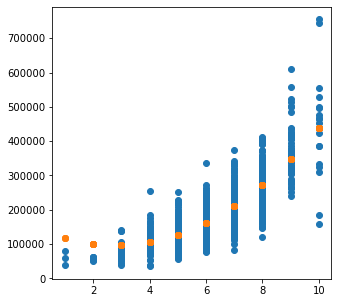

In [216]:
#가중치 시각화(OverallQual)
plt.figure(figsize=(5,5))
plt.scatter(X_train['OverallQual'],y_train) # 현재 데이터 분포

# 특성확장
# 최고차항이 2차항이 되도록 만들기 위해서 특성을 제곱
#X_train['OverallQual x OverallQual'] = X_train['OverallQual'] * X_train['OverallQual']

# 선형모델의 예측결과 시각화
OverallQual_model = LinearRegression()
OverallQual_model.fit(X_train[['OverallQual','OverallQual x OverallQual']],y_train)
pre = OverallQual_model.predict(X_train[['OverallQual','OverallQual x OverallQual']])

plt.scatter(X_train['OverallQual'],pre) #예측 데이터 분포
plt.show()

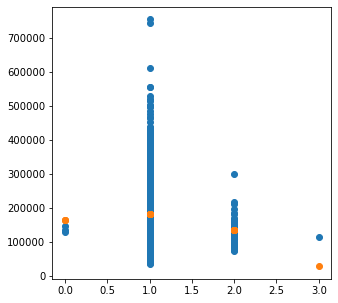

In [217]:
#가중치 시각화(KitchenAbvGr)
plt.figure(figsize=(5,5))
plt.scatter(X_train['KitchenAbvGr'],y_train) # 현재 데이터 분포

# 특성확장
# 최고차항이 2차항이 되도록 만들기 위해서 특성을 제곱
#X_train['KitchenAbvGr x KitchenAbvGr'] = X_train['KitchenAbvGr'] * X_train['KitchenAbvGr']

# 선형모델의 예측결과 시각화
KitchenAbvGr_model = LinearRegression()
KitchenAbvGr_model.fit(X_train[['KitchenAbvGr','KitchenAbvGr x KitchenAbvGr']],y_train)
pre = KitchenAbvGr_model.predict(X_train[['KitchenAbvGr','KitchenAbvGr x KitchenAbvGr']])

plt.scatter(X_train['KitchenAbvGr'],pre) #예측 데이터 분포
plt.show()

In [218]:
# 특성확장된 컬럼을 바탕으로 다시 예측
extend_linear_model = LinearRegression()

In [219]:
extend_linear_model.fit(X_train,y_train)

LinearRegression()

In [220]:
result = cross_val_score(linear_model,X_train,y_train,cv=5)
result.mean()

0.8514480727874799

### 모델학습

- 선형모델(linear)

In [171]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [172]:
final_pre = linear_model.predict(X_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 136 is different from 135)

In [ ]:
gender_sub = pd.read_csv('data/sample_submission.csv')
gender_sub['SalePrice'] = final_pre # 내 모델의 예측결과 양식에 넣기
gender_sub.to_csv('BaseLine_LinearOnly.csv', index=False) # csv파일로 뽑아내기

- 선형모델 특성확장 학습

In [221]:
extend_linear_model = LinearRegression()
extend_linear_model.fit(X_train,y_train)

LinearRegression()

In [222]:
# 특성확장
# 최고차항이 2차항이 되도록 만들기 위해서 특성을 제곱
X_test['OverallQual x OverallQual'] = X_test['OverallQual'] * X_test['OverallQual']
X_test['KitchenAbvGr x KitchenAbvGr'] = X_test['KitchenAbvGr'] * X_test['KitchenAbvGr']

<ipython-input-222-a8dc66ffb805>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['OverallQual x OverallQual'] = X_test['OverallQual'] * X_test['OverallQual']
<ipython-input-222-a8dc66ffb805>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['KitchenAbvGr x KitchenAbvGr'] = X_test['KitchenAbvGr'] * X_test['KitchenAbvGr']


In [223]:
final_pre = extend_linear_model.predict(X_test)

In [224]:
gender_sub = pd.read_csv('data/sample_submission.csv')
gender_sub['SalePrice'] = final_pre # 내 모델의 예측결과 양식에 넣기
gender_sub.to_csv('BaseLine_LinearExtendOnly.csv', index=False) # csv파일로 뽑아내기

- DecisionTree

In [44]:
final_tree = DecisionTreeRegressor(max_depth=6)
final_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [45]:
final_pre = final_tree.predict(X_test)

In [46]:
gender_sub = pd.read_csv('data/sample_submission.csv')
gender_sub['SalePrice'] = final_pre # 내 모델의 예측결과 양식에 넣기
gender_sub.to_csv('BaseLine_DecisionOnly.csv', index=False) # csv파일로 뽑아내기

- 앙상블 Voting(KNN, DecsionTree)

In [68]:
best_tree_model = DecisionTreeRegressor(max_depth=6) # 스케일링이 안들어간 데이터
best_knn_model = KNeighborsRegressor(n_neighbors=5) # 스케일링이 들어간 데이터

In [69]:
best_tree_model.fit(X_train,y_train)
best_knn_model.fit(X_train_transformed,y_train)

KNeighborsRegressor()

In [71]:
#tree모델 결과 예측, 출력
tree_pre = best_tree_model.predict(X_test)
tree_pre

array([263415.89387625, 135581.88817723, 219407.14898238, ...,
       141440.19874311, 176049.89190502, 126397.74771828])

In [72]:
#KNN모델 결과 예측, 출력
X_test_transformed = mm_scaler.transform(X_test) # test 스케일링
knn_pre = best_knn_model.predict(X_test_transformed)
knn_pre

array([247904.66285408, 140363.76176843, 226663.67734841, ...,
       135151.47980839, 194800.82237484, 129384.6796883 ])

In [74]:
# tree, knn 합치기
# Numpy 연산은 같은 인덱스 요소 끼리 연산된다.
tree_knn_mix = (tree_pre + knn_pre)/2

In [76]:
gender_sub = pd.read_csv('data/sample_submission.csv')
gender_sub['SalePrice'] = tree_knn_mix
gender_sub.to_csv('BaseLine_Voting_treeKnn.csv', index=False)

- 앙상블 Voting(선형모델, DecsionTree)

In [225]:
best_tree_model = DecisionTreeRegressor(max_depth=6) #  tree모델
best_linear_model = LinearRegression() # 선형모델

In [226]:
best_tree_model.fit(X_train,y_train)
best_linear_model.fit(X_train,y_train)

LinearRegression()

In [227]:
#tree모델 결과 예측, 출력
tree_pre = best_tree_model.predict(X_test)
tree_pre

array([263415.89387625, 135581.88817723, 219407.14898238, ...,
       141440.19874311, 176049.89190502, 126397.74771828])

In [228]:
#tree모델 결과 예측, 출력
linear_pre = best_linear_model.predict(X_test)
linear_pre

array([259834.87319773, 143665.18101295, 211274.25841219, ...,
       126461.42969377, 175630.78109253, 118420.9599523 ])

In [229]:
# tree, linear 합치기
# Numpy 연산은 같은 인덱스 요소 끼리 연산된다.
tree_linear_mix = (tree_pre + linear_pre)/2

In [230]:
gender_sub = pd.read_csv('data/sample_submission.csv')
gender_sub['SalePrice'] = tree_linear_mix
gender_sub.to_csv('BaseLine_Voting_treeLinear.csv', index=False)

- 앙상블 Voting(treeBagging,선형Bagging)

In [264]:
bagtree_baglinear_mix = (Linearbagging_pre+rf_pre)/2

In [266]:
gender_sub = pd.read_csv('data/sample_submission.csv')
gender_sub['SalePrice'] = bagtree_baglinear_mix
gender_sub.to_csv('BaseLine_Voting_bagtreeBagknn.csv', index=False)

- 앙상블 Bagging(DecisionTree)

In [254]:
from sklearn.ensemble import RandomForestRegressor #RandomForest방식 이용
from sklearn.model_selection import GridSearchCV #RandomForest 하이퍼파라미터 튜닝을 위한 툴

In [255]:
#RandomForest형식()
rf_model = RandomForestRegressor(random_state=916, #random_state 난수고정 속성(값 일정하게 하기 위함)
                                 n_estimators=50,  # n_estimators 나무를 몇 개를 만들건지(많을수록 과소적합)
                                 max_depth=10, #max_depth 상승할수록 과대적합
                                 max_features=0.5) # 나무를 뽑을 때 마다 내가 가진 features 중에서 몇 %를 뽑을건가?(영상확인...)

In [256]:
params = {
    'n_estimators' : [15,50,80,100,200,400],
    'max_depth' : [4,6,8,10],
    'max_features' : [0.3,0.4,0.5,0.6,0.7],
    'n_jobs' : [-1] # cpu core를 그리드서치에 최대한 집중해달라
} 

In [257]:
# 교차검증 5회 실시
gird = GridSearchCV(rf_model,params,cv=5)

In [258]:
# 훈련실시 (컴퓨터 사양 낮으면 구글 colab이용)
gird.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, max_features=0.5,
                                             n_estimators=50,
                                             random_state=916),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [15, 50, 80, 100, 200, 400],
                         'n_jobs': [-1]})

In [260]:
gird.best_params_ #최적의 조합

{'max_depth': 10, 'max_features': 0.3, 'n_estimators': 400, 'n_jobs': -1}

In [261]:
best_model = gird.best_estimator_ # grid.best_estimator_에 최적의 조합이 저장되어 잇음 이를 변수에 저장

In [262]:
rf_pre = best_model.predict(X_test)

In [268]:
rf_pre 

array([262025.28058767, 137742.1524186 , 215784.49641165, ...,
       135571.45748284, 184712.07337209, 118373.41852437])

In [263]:
gender_sub = pd.read_csv('data/sample_submission.csv')
gender_sub['SalePrice'] = rf_pre
gender_sub.to_csv('BaseLine_Bagging.csv',index=False)

- 앙상블 Bagging(선형모델)

In [237]:
from sklearn.ensemble import BaggingRegressor #모델별 bagging지원 툴
from sklearn.model_selection import GridSearchCV #bagging 하이퍼파라미터 튜닝을 위한 툴

In [245]:
clf = BaggingRegressor(base_estimator=LinearRegression(),
                        n_estimators=50,
                        max_features=0.5,
                        random_state=0).fit(X_train, y_train)

In [246]:
params = {
    'n_estimators' : [15,50,80,100,200,400],
    'max_features' : [0.3,0.4,0.5,0.6,0.7],
    'n_jobs' : [-1] # cpu core를 그리드서치에 최대한 집중해달라
} 

In [247]:
# 교차검증 5회 실시
gird = GridSearchCV(clf,params,cv=5)

In [248]:
# 훈련실시 (컴퓨터 사양 낮으면 구글 colab이용)
gird.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        max_features=0.5, n_estimators=50,
                                        random_state=0),
             param_grid={'max_features': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [15, 50, 80, 100, 200, 400],
                         'n_jobs': [-1]})

In [249]:
gird.best_params_ #최적의 조합

{'max_features': 0.7, 'n_estimators': 15, 'n_jobs': -1}

In [250]:
best_model = gird.best_estimator_

In [253]:
Linearbagging_pre = best_model.predict(X_test)

array([257273.81392713, 138888.77676567, 216049.95916224, ...,
       131978.93190713, 178085.79615993, 114219.19720559])

In [267]:
Linearbagging_pre

array([257273.81392713, 138888.77676567, 216049.95916224, ...,
       131978.93190713, 178085.79615993, 114219.19720559])

In [252]:
gender_sub = pd.read_csv('data/sample_submission.csv')
gender_sub['SalePrice'] = Linearbagging_pre
gender_sub.to_csv('BaseLine_Linear_Bagging.csv',index=False)